In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = '../input/breast-cancer-wisconsin-data/data.csv'

In [3]:
table = pd.read_csv(data)

In [4]:
table = table.sample(frac = 1)

In [5]:
table.shape

(569, 33)

In [6]:
table.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
416,905978,B,9.405,21.70,59.60,271.2,0.10440,0.06159,0.02047,0.01257,...,31.24,68.73,359.4,0.1526,0.1193,0.06141,0.0377,0.2872,0.08304,NaN
392,903507,M,15.490,19.97,102.40,744.7,0.11600,0.15620,0.18910,0.09113,...,29.41,142.10,1359.0,0.1681,0.3913,0.55530,0.2121,0.3187,0.10190,NaN
89,861598,B,14.640,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.07064,...,18.24,109.40,803.6,0.1277,0.3089,0.26040,0.1397,0.3151,0.08473,NaN
233,88206102,M,20.510,27.81,134.40,1319.0,0.09159,0.10740,0.15540,0.08340,...,37.38,162.70,1872.0,0.1223,0.2761,0.41460,0.1563,0.2437,0.08328,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.1932,0.3063,0.08368,NaN


In [7]:
table.drop('Unnamed: 32', axis=1, inplace=True)

In [8]:
table.drop('id', axis=1, inplace=True)

Number of Benign:  357
Number of Malignant :  212


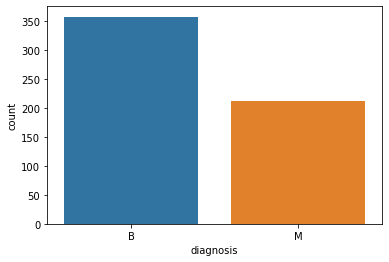

In [9]:
ax = sns.countplot(table['diagnosis'],label="Count")
B, M = table['diagnosis'].value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [10]:
from sklearn.preprocessing import  MinMaxScaler
scl=MinMaxScaler()

In [11]:
table['diagnosis'].replace({'M':1, 'B':0}, inplace=True)

In [12]:
test_set = table.iloc[-20:, :]

In [13]:
test_set.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
314,0,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.00000,0.2163,...,8.952,22.44,56.65,240.1,0.1347,0.07767,0.0000,0.0000,0.3142,0.08116
194,1,14.860,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,...,16.080,27.78,118.60,784.7,0.1316,0.46480,0.4589,0.1727,0.3000,0.08701
461,1,27.420,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.16890,0.2061,...,36.040,31.37,251.20,4254.0,0.1357,0.42560,0.6833,0.2625,0.2641,0.07427
567,1,20.600,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.1650,0.86810,0.9387,0.2650,0.4087,0.12400
141,1,16.110,18.05,105.10,813.0,0.09721,0.11370,0.09447,0.05943,0.1861,...,19.920,25.27,129.00,1233.0,0.1314,0.22360,0.2802,0.1216,0.2792,0.08158


In [14]:
drop_index = test_set.index

In [15]:
drop_index

Int64Index([314, 194, 461, 567, 141, 242, 239, 197, 509,  25, 505, 127, 482,
            428, 537, 354, 496, 238, 200, 344],
           dtype='int64')

In [16]:
table.drop(drop_index, inplace=True)

In [17]:
table.shape

(549, 31)

In [18]:
x = table.iloc[:,1:]

In [19]:
y = table.iloc[:,:1]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [22]:
x_train=scl.fit_transform(x_train)
x_test=scl.fit_transform(x_test)

In [23]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(439, 30) (439, 1) (110, 30) (110, 1)


In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
sm = SMOTE()

In [26]:
x_train_f, y_train_f = sm.fit_sample(x_train, y_train)
x_test_f, y_test_f = sm.fit_sample(x_test, y_test)

In [27]:
print(x_train_f.shape, y_train_f.shape, x_test_f.shape, y_test_f.shape)

(560, 30) (560, 1) (132, 30) (132, 1)


In [28]:
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras.optimizers import Adam, Nadam, SGD, Adamax
from tensorflow.keras.models import Sequential

In [29]:
act = ['relu', 'swish']
lr = 0.001
opt = [Adam(learning_rate=lr),SGD(learning_rate=lr),Nadam(learning_rate=lr), Adamax(learning_rate=lr)]
epoch = 200
optim = opt[3]
activ=act[1]

In [30]:
def the_model():
    model = Sequential([
        L.Dense(x_train.shape[1], input_shape= (x_train.shape[1],)),
        L.BatchNormalization(),
        L.Dropout(0.3),
        L.Dense(50, activation=activ),
        L.BatchNormalization(),
        L.Dropout(0.3),
        L.Dense(50, activation=activ),
        L.BatchNormalization(),
        L.Dropout(0.2),
        L.Dense(20, activation=activ),
        L.BatchNormalization(),
        L.Dropout(0.2),
        L.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer= optim, loss='binary_crossentropy',metrics='accuracy')
    return model

In [31]:
model = the_model()
hist = model.fit(x_train, y_train, epochs=epoch, validation_data=(x_test,y_test))

Epoch 1/200
14/14 [==============================] - 0s 24ms/step - loss: 0.7335 - accuracy: 0.6287 - val_loss: 0.6559 - val_accuracy: 0.9091
Epoch 2/200
14/14 [==============================] - 0s 4ms/step - loss: 0.5664 - accuracy: 0.7039 - val_loss: 0.6245 - val_accuracy: 0.8727
Epoch 3/200
14/14 [==============================] - 0s 4ms/step - loss: 0.4642 - accuracy: 0.8109 - val_loss: 0.5961 - val_accuracy: 0.8545
Epoch 4/200
14/14 [==============================] - 0s 4ms/step - loss: 0.4208 - accuracy: 0.8155 - val_loss: 0.5695 - val_accuracy: 0.8182
Epoch 5/200
14/14 [==============================] - 0s 4ms/step - loss: 0.3762 - accuracy: 0.8610 - val_loss: 0.5431 - val_accuracy: 0.8273
Epoch 6/200
14/14 [==============================] - 0s 4ms/step - loss: 0.3480 - accuracy: 0.8724 - val_loss: 0.5153 - val_accuracy: 0.8727
Epoch 7/200
14/14 [==============================] - 0s 4ms/step - loss: 0.3515 - accuracy: 0.8656 - val_loss: 0.4847 - val_accuracy: 0.8727
Epoch 8/200


In [32]:
model1 = the_model()
hist1 = model1.fit(x_train_f, y_train_f, epochs=epoch, validation_data=(x_test_f,y_test_f))

Epoch 1/200
18/18 [==============================] - 0s 14ms/step - loss: 1.0804 - accuracy: 0.5214 - val_loss: 0.6724 - val_accuracy: 0.6439
Epoch 2/200
18/18 [==============================] - 0s 3ms/step - loss: 0.6857 - accuracy: 0.6571 - val_loss: 0.6375 - val_accuracy: 0.8939
Epoch 3/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5400 - accuracy: 0.7393 - val_loss: 0.6031 - val_accuracy: 0.9621
Epoch 4/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4752 - accuracy: 0.7821 - val_loss: 0.5673 - val_accuracy: 0.9848
Epoch 5/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4216 - accuracy: 0.8196 - val_loss: 0.5342 - val_accuracy: 0.9924
Epoch 6/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3813 - accuracy: 0.8232 - val_loss: 0.4962 - val_accuracy: 0.9924
Epoch 7/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3746 - accuracy: 0.8393 - val_loss: 0.4577 - val_accuracy: 0.9924
Epoch 8/200


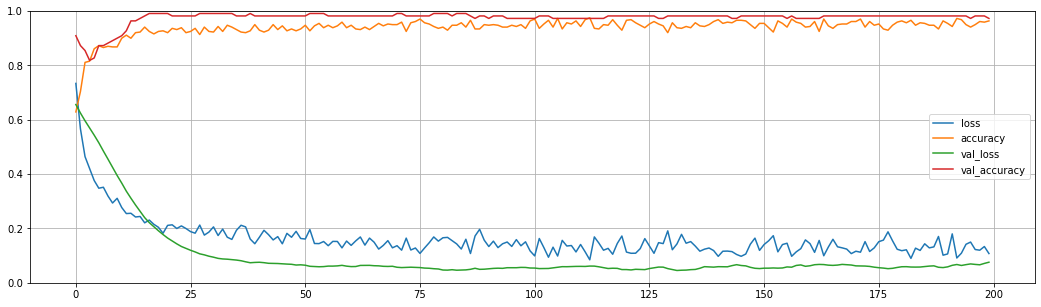

In [33]:
pd.DataFrame(hist.history).plot(figsize=(18, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

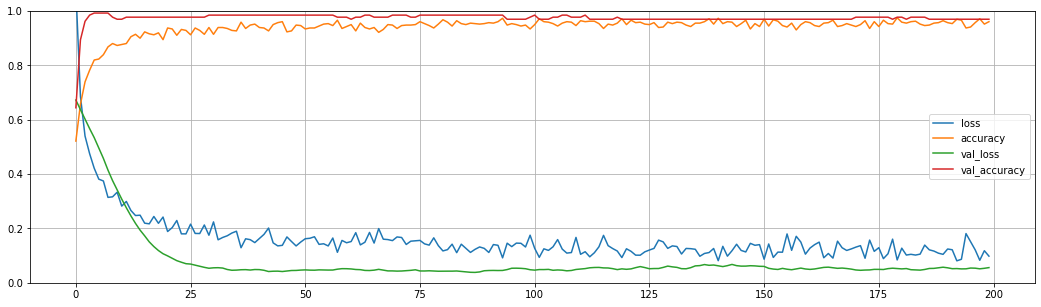

In [34]:
pd.DataFrame(hist1.history).plot(figsize=(18, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [35]:
pd.DataFrame(hist.history).tail()

,loss,accuracy,val_loss,val_accuracy
195,0.149882,0.940775,0.069445,0.972727
196,0.122502,0.949886,0.067643,0.981818
197,0.119912,0.961276,0.066263,0.981818
198,0.133440,0.958998,0.071324,0.981818
199,0.107622,0.963554,0.075725,0.972727


In [36]:
pd.DataFrame(hist1.history).tail()

,loss,accuracy,val_loss,val_accuracy
195,0.151025,0.941071,0.054282,0.969697
196,0.121277,0.957143,0.053760,0.969697
197,0.082954,0.971429,0.051469,0.969697
198,0.118015,0.951786,0.053350,0.969697
199,0.098059,0.960714,0.055899,0.969697


# Prediction

In [37]:
valid_x = scl.fit_transform(test_set.iloc[:,1:])

In [38]:
valid_y=test_set.iloc[:,:1]

In [39]:
print(valid_x.shape, valid_y.shape)

(20, 30) (20, 1)


In [40]:
print(valid_y)

     diagnosis
314          0
194          1
461          1
567          1
141          1
242          0
239          1
197          1
509          1
25           1
505          0
127          1
482          0
428          0
537          0
354          0
496          0
238          0
200          0
344          0


In [41]:
prediction = model.predict(valid_x)

In [42]:
prediction1 = model1.predict(valid_x)

In [43]:
for i,j in zip(prediction, valid_y.values):
    if i >= 0.5:
        print('Malignant',j)
    else: print('Fine',j)

Fine [0]
Fine [1]
Malignant [1]
Malignant [1]
Malignant [1]
Fine [0]
Malignant [1]
Fine [1]
Malignant [1]
Malignant [1]
Fine [0]
Malignant [1]
Fine [0]
Fine [0]
Fine [0]
Fine [0]
Fine [0]
Fine [0]
Fine [0]
Fine [0]


In [44]:
for i,j in zip(prediction1, valid_y.values):
    if i >= 0.5:
        print('Malignant',j)
    else: print('Fine',j)

Fine [0]
Fine [1]
Malignant [1]
Malignant [1]
Fine [1]
Fine [0]
Malignant [1]
Fine [1]
Malignant [1]
Malignant [1]
Fine [0]
Fine [1]
Fine [0]
Fine [0]
Fine [0]
Fine [0]
Fine [0]
Fine [0]
Fine [0]
Fine [0]
